In [1]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [16]:
os.chdir(r"C:\Users\15088\OneDrive\Desktop\SEP 789 Final Project\data\Sign-Language-Dataset")
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        print(valid_samples)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
            
        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
            
os.chdir('../..')

['IMG_5918.JPG', 'IMG_5867.JPG', 'IMG_5017.JPG', 'IMG_4466.JPG', 'IMG_4506.JPG', 'IMG_5042.JPG', 'IMG_4574.JPG', 'IMG_1179.JPG', 'IMG_4370.JPG', 'IMG_4446.JPG', 'IMG_5603.JPG', 'IMG_5971.JPG', 'IMG_4286.JPG', 'IMG_4254.JPG', 'IMG_4554.JPG', 'IMG_4826.JPG', 'IMG_4936.JPG', 'IMG_4413.JPG', 'IMG_1229.JPG', 'IMG_5736.JPG', 'IMG_5007.JPG', 'IMG_4139.JPG', 'IMG_5786.JPG', 'IMG_4456.JPG', 'IMG_4956.JPG', 'IMG_4725.JPG', 'IMG_4276.JPG', 'IMG_4745.JPG', 'IMG_5286.JPG', 'IMG_1239.JPG']
['IMG_5044.JPG', 'IMG_5858.JPG', 'IMG_4675.JPG', 'IMG_1240.JPG', 'IMG_4766.JPG', 'IMG_4172.JPG', 'IMG_4318.JPG', 'IMG_5951.JPG', 'IMG_5919.JPG', 'IMG_5686.JPG', 'IMG_4204.JPG', 'IMG_5267.JPG', 'IMG_1230.JPG', 'IMG_5214.JPG', 'IMG_5245.JPG', 'IMG_1170.JPG', 'IMG_4100.JPG', 'IMG_1291.JPG', 'IMG_5898.JPG', 'IMG_4080.JPG', 'IMG_4244.JPG', 'IMG_1271.JPG', 'IMG_5008.JPG', 'IMG_4414.JPG', 'IMG_4746.JPG', 'IMG_5549.JPG', 'IMG_4194.JPG', 'IMG_5133.JPG', 'IMG_5447.JPG', 'IMG_4130.JPG']
['IMG_4717.JPG', 'IMG_4918.JPG', 'IMG_

In [23]:
train_path = r"C:\Users\15088\OneDrive\Desktop\SEP 789 Final Project\data\Sign-Language-Dataset\train"
valid_path = r"C:\Users\15088\OneDrive\Desktop\SEP 789 Final Project\data\Sign-Language-Dataset\valid"
test_path = r"C:\Users\15088\OneDrive\Desktop\SEP 789 Final Project\data\Sign-Language-Dataset\test"

In [26]:
# MobileNet requires rescaling each pixel t0 between -1 and 1
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input, horizontal_flip=True, width_shift_range=0.5, height_shift_range=0.5,rotation_range=90,brightness_range=[0.2,1.0], zoom_range=0.5).flow_from_directory(directory=train_path, target_size=(224, 224), batch_size = 30)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size = 30)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=30, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


## Modify Model

In [28]:
mobileNet = tf.keras.applications.mobilenet.MobileNet()

In [29]:
mobileNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [30]:
len(mobileNet.layers)

92

In [31]:
x = mobileNet.layers[-6].output
x

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d')>

In [32]:
dense = Dense(units = 32, activation = "relu")(x)
output = Dense(units = 10, activation = "softmax")(dense)

In [33]:
model = keras.Model(inputs = mobileNet.input, outputs = output)

In [34]:
for layer in model.layers[: -23]:
    layer.trainable = False

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## Model Training

In [36]:
model.compile(optimizer = keras.optimizers.Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2,patience=25)

In [38]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=50, verbose=2, callbacks=[early_stop])

Epoch 1/50
58/58 - 39s - loss: 2.0382 - accuracy: 0.2810 - val_loss: 2.2339 - val_accuracy: 0.2467
Epoch 2/50
58/58 - 36s - loss: 1.5481 - accuracy: 0.4533 - val_loss: 1.5883 - val_accuracy: 0.4333
Epoch 3/50
58/58 - 36s - loss: 1.2671 - accuracy: 0.5613 - val_loss: 0.9358 - val_accuracy: 0.7667
Epoch 4/50
58/58 - 37s - loss: 1.1264 - accuracy: 0.6092 - val_loss: 0.7139 - val_accuracy: 0.8000
Epoch 5/50
58/58 - 37s - loss: 1.0183 - accuracy: 0.6431 - val_loss: 0.5320 - val_accuracy: 0.8533
Epoch 6/50
58/58 - 39s - loss: 0.9276 - accuracy: 0.6764 - val_loss: 0.5287 - val_accuracy: 0.8367
Epoch 7/50
58/58 - 38s - loss: 0.8960 - accuracy: 0.6933 - val_loss: 0.4282 - val_accuracy: 0.8500
Epoch 8/50
58/58 - 36s - loss: 0.8486 - accuracy: 0.7068 - val_loss: 0.3675 - val_accuracy: 0.8833
Epoch 9/50
58/58 - 37s - loss: 0.7880 - accuracy: 0.7319 - val_loss: 0.3464 - val_accuracy: 0.8767
Epoch 10/50
58/58 - 36s - loss: 0.8271 - accuracy: 0.7074 - val_loss: 0.2977 - val_accuracy: 0.8967
Epoch 11/

<AxesSubplot:>

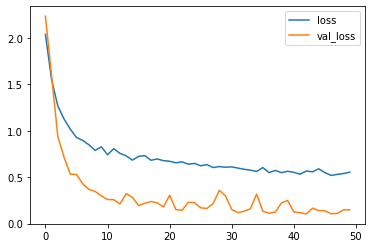

In [39]:
history = pd.DataFrame(model.history.history).filter(['loss', 'val_loss'])
history.plot()

<AxesSubplot:>

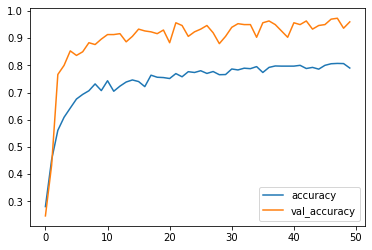

In [40]:
history = pd.DataFrame(model.history.history).filter(['accuracy', 'val_accuracy'])
history.plot()

## Model Testing

In [41]:
test_labels = test_batches.classes

In [42]:
predictions = model.predict(x=test_batches, verbose=2)

2/2 - 1s


In [43]:
predictions.argmax(axis=1)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 6, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8,
       8, 9, 9, 9, 9, 1], dtype=int64)

In [44]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [45]:
cm

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 4, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 4]], dtype=int64)

In [46]:
model.save("tuned_mobilenet.h5")

In [47]:
np.expand_dims(test_batches.next()[0][0], axis = 0).shape

(1, 224, 224, 3)

In [48]:
pred = model.predict(np.expand_dims(test_batches.next()[0][0], axis = 0))

In [49]:
pred

array([[5.6527039e-10, 4.8563784e-06, 1.7335134e-06, 6.2616651e-10,
        4.6237299e-04, 9.1731891e-08, 9.9953043e-01, 2.2112118e-07,
        7.9553004e-08, 7.0252568e-08]], dtype=float32)

## Convert Keras Model to TF.js format

In [138]:
!pip install tensorflowjs

You should consider upgrading via the 'c:\users\15088\anaconda3\python.exe -m pip install --upgrade pip' command.


In [50]:
import tensorflowjs as tfjs

In [51]:
tfjs.converters.save_keras_model(model, "tuned_mobilenet_js")

C:\Users\15088\Anaconda3\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


1. With Data Augmentation, as the model being trained, the train accuracy slowly decreases while the validation accuracy remains increasing.
2. Data Augmentation makes a big difference especially when dataset is quite small and uniform.